### Exercice 2 : Mile Per Gallon

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = sns.load_dataset('mpg')


1. Quelles sont les variables discrètes et continues de ce dataset ?

2. Analysez la variable mpg.

- Quelle est la moyenne ? Que représente-t'elle vraiment ? (soyez clair et précis !)

- Tracez les 2 graphiques utiles pour cette variable

3. Analysez la variable "cylindres"

4. Analysez la variable "origine"

5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)

- Que semble-t-on voir ?

- Rajoutez-y la variable de l'année du modèle. Que voit-on ?

6. Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.

- Que semble-t-on voir ?

- Voit-on également cela pour les autres pays ?

7. Analysez la relation entre le nombre de cylindres et l'année du modèle.

- Se dégage-t'il quelque chose de cette analyse ?

8. Analysez la relation entre le nombre de cylindres et l'origine.

- Se dégage-t'il quelque chose de cette analyse ?

9. Quelle est l'accélération moyenne des voitures des différents pays ?

10. Quelle est-elle pour les modèles de l'année 80 ?

11. Au final Il semblerait qu'une tendance se dégage à travers le temps...

- faites la liste de tous les phénomènes qui semblent se produire (diminution ? augmentation ?) pour les différentes variables et groupes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

1. Analyse de la variable mpg

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

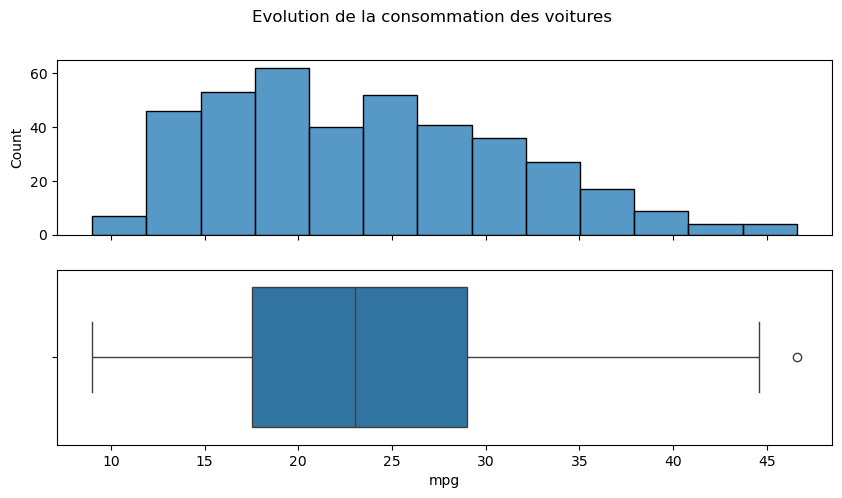

In [9]:
# Analyse graphique
fig, ax = plt.subplots(2,1, sharex=True, figsize = (10,5))
sns.histplot(df, x='mpg', ax=ax[0])
sns.boxplot(df, x='mpg', ax=ax[1])
plt.suptitle('Evolution de la consommation des voitures')

plt.show()

2. Analyse de la variable cylinders et origine

In [10]:
df['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [11]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

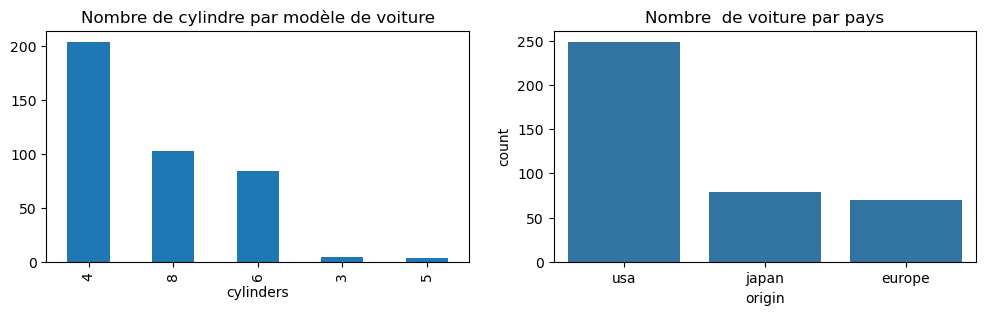

In [12]:
fig, ax = plt.subplots(1,2, figsize =(12,3))

df['cylinders'].value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Nombre de cylindre par modèle de voiture')

sns.countplot(df, x='origin', ax=ax[1])
ax[1].set_title('Nombre  de voiture par pays')

plt.show()

4.Evolution de la consommation des voitures (mpg) par rapport au nombre de cheveux (horsepowers)

In [13]:
df[['mpg','horsepower']].describe()

,mpg,horsepower
count,398.000000,392.000000
mean,23.514573,104.469388
std,7.815984,38.491160
min,9.000000,46.000000
25%,17.500000,75.000000
50%,23.000000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


<Axes: xlabel='mpg', ylabel='horsepower'>

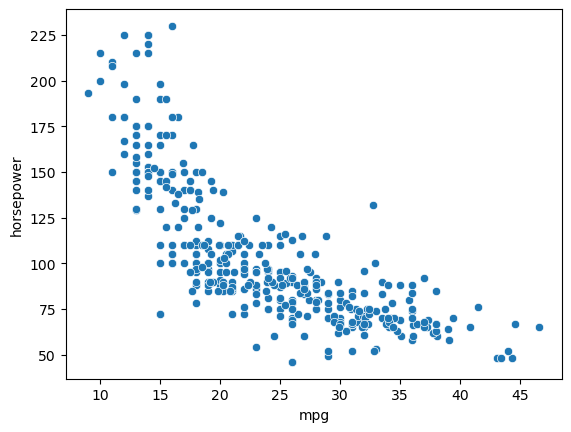

In [14]:
sns.scatterplot(df, x='mpg', y='horsepower')

<Axes: xlabel='mpg', ylabel='horsepower'>

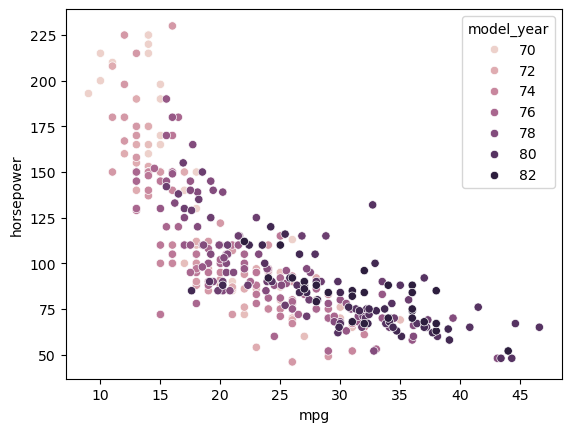

In [15]:
sns.scatterplot(df, x='mpg', y='horsepower', hue='model_year')

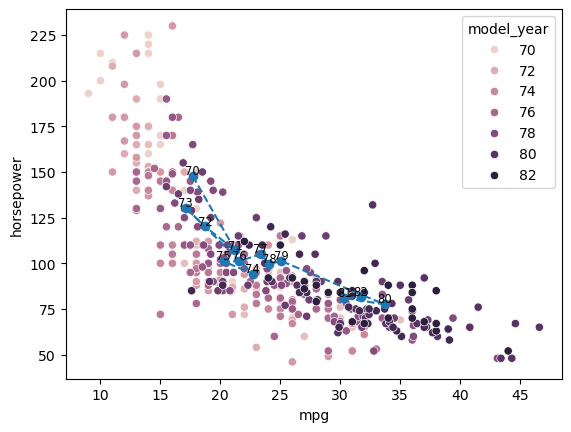

In [40]:
df_year = df.groupby('model_year')[['horsepower','mpg']].mean()
plt.plot(df_year['mpg'], df_year['horsepower'], '--o')
plt.xlabel('mpg')
plt.ylabel('horsepower')

sns.scatterplot(df, x='mpg', y='horsepower', hue='model_year')

# Ajouter les annotations pour chaque point (année)
for i , row in df_year.iterrows():
    plt.text(row['mpg'], row['horsepower']+1, i,
             horizontalalignment='center', size='small', color='black')   

plt.show()        

6. évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.


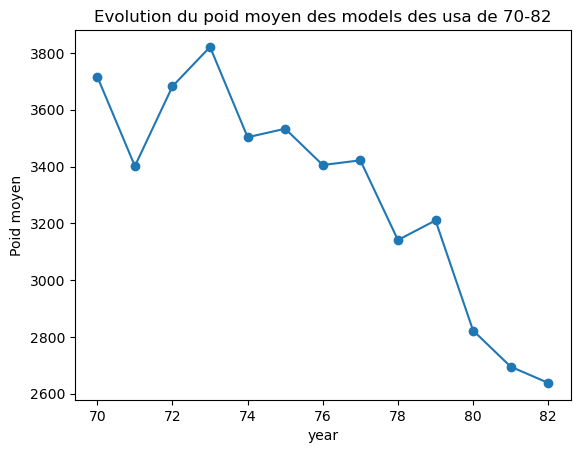

In [17]:
df_temp = df.query("`origin` == 'usa'").groupby('model_year')['weight'].mean()
plt.plot(df_temp.index, df_temp.values, '-o')
plt.title('Evolution du poid moyen des models des usa de 70-82')
plt.xlabel('year')
plt.ylabel('Poid moyen')
plt.show()

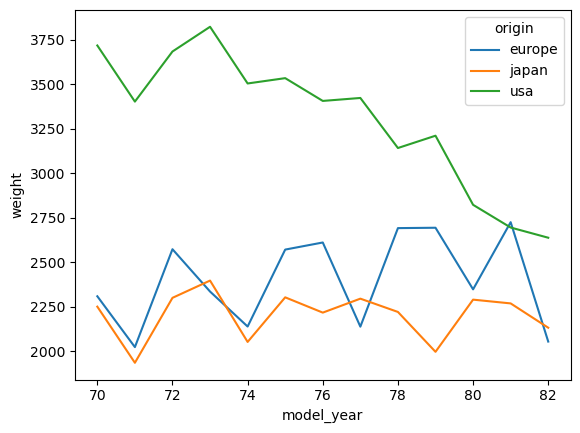

In [18]:
# les autres pays
df_temp1 = df.groupby(['model_year', 'origin'])['weight'].mean().reset_index()
sns.lineplot(df_temp1, x='model_year', y='weight', hue='origin')
plt.show()

7. Analysez la relation entre le nombre de cylindres et l'année du modèle.

- Se dégage-t'il quelque chose de cette analyse ?

In [19]:
pd.crosstab(df['cylinders'], df['model_year'])

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
cylinders,,,,,,,,,,,,,
3,0,0,1,1,0,0,0,1,0,0,1,0,0
4,7,13,14,11,15,12,15,14,17,12,25,21,28
5,0,0,0,0,0,0,0,0,1,1,1,0,0
6,4,8,0,8,7,12,10,5,12,6,2,7,3
8,18,7,13,20,5,6,9,8,6,10,0,1,0


<Axes: xlabel='model_year', ylabel='cylinders'>

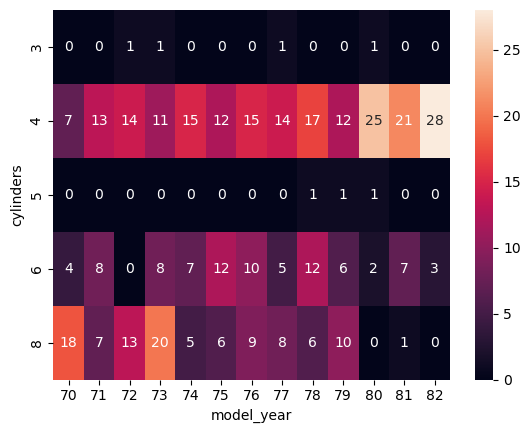

In [20]:
sns.heatmap(pd.crosstab(df['cylinders'], df['model_year']), annot=True)

Text(0, 0.5, 'proportion')

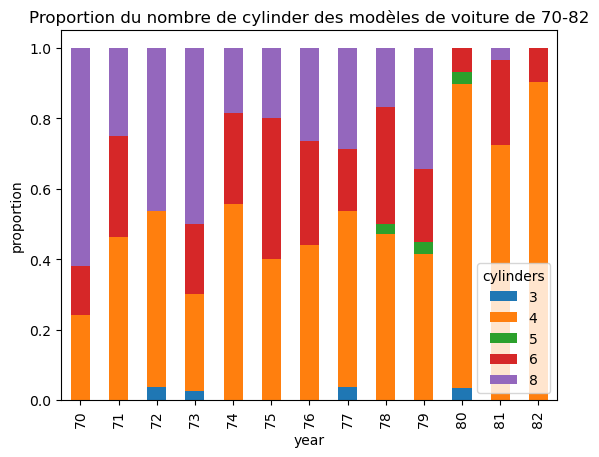

In [43]:
pd.crosstab(df['model_year'], df['cylinders'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Proportion du nombre de cylinder des modèles de voiture de 70-82')
plt.xlabel('year')
plt.ylabel('proportion')

8. Analysez la relation entre le nombre de cylindres et l'origine.

- Se dégage-t'il quelque chose de cette analyse ?


In [22]:
pd.crosstab(df['cylinders'], df['origin'])

origin,europe,japan,usa
cylinders,,,
3,0,4,0
4,63,69,72
5,3,0,0
6,4,6,74
8,0,0,103


9. Quelle est l'accélération moyenne des voitures des différents pays ?


In [23]:
df.groupby('origin')['acceleration'].mean()

origin
europe    16.787143
japan     16.172152
usa       15.033735
Name: acceleration, dtype: float64

10. Quelle est-elle pour les modèles de l'année 80 ?

In [24]:
df.query("`model_year` == 80").groupby('origin')['acceleration'].mean()

origin
europe    18.366667
japan     16.015385
usa       16.800000
Name: acceleration, dtype: float64

11. Au final Il semblerait qu'une tendance se dégage à travers le temps...

- faites la liste de tous les phénomènes qui semblent se produire (diminution ? augmentation ?) pour les différentes variables et groupes